Analysis of the World Happiness Report 2021
===
**Varun Ayyappan**

Outline
---
1. Introduction
    1. About the Report
    2. Purpose
2. Data Collection and Processing
    1. Imports
    2. Load the data
    3. Prepare the Main Data Set
    4. Prepare the 2021 Data Set
    5. Concatenate the data sets together.
3. Exploratory Data Analysis
    1. Summary Statistics
    2. Violin Plot
    3. Heat Map
    4. 
4. Hypothesis Testing and Machine Learning
5. Conclusion

Introduction
---

### About the Report
The World Happiness Report is an annual publication by the [Sustainable Development Solutions Network](https://www.unsdsn.org/) (SDSN) of the United Nations. The project seeks to measure the happiness of the people from various nations araound the world by aggraegating several ecenomic and social factors. The United Nations commisioned these reports in order to create a more holistic definition of uplifting and developing a nation then traditional indices such as the [Human Development Index](http://hdr.undp.org/en/content/human-development-index-hdi) or [Gross Domestic Product](https://www.imf.org/external/pubs/ft/fandd/basics/gdp.htm). As of publishing this tutorial, the current release of the report is the 2021 edition which can be found [here](https://worldhappiness.report/ed/2021/).

### Purpose
The purpose of this turorial is to figure out what are the top factors which contribute to a population's happiness. Once these metrics are isolated, the next inquiry is if a nation's happiness can be predicted by those factors. 

Data Collection and Processing
---
The World Happiness Report publishes the data sets used in their analysis as Excel files on their website. The main set we will focus on is this [one](https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls), which includes all of the data gathered by the SDSN for prior editions of the report. In addition, we will add the data in this [file](https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls), because it includes the World Happiness Report data for 2021. We will retrieve, prepare, and combine these two data sets in this section of the tutorial.

### Imports
We will utilize the [Pandas](https://pandas.pydata.org/docs/reference/), [Numpy](https://numpy.org/doc/), [Matplotlib](https://matplotlib.org/), and [Seaborn](https://seaborn.pydata.org/) Python libraries in order to manipulate and visualize the data. 

In [73]:
# Import all of the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

### Load the data
Pandas can read in the data from Excel file and automatically populate a new dataframe with the `read_excel` method.

In [66]:
# Read in data from the two Excel files into dataframes
main_data = pd.read_excel('../data/DataPanelWHR2021C2.xls', sheet_name = 'Sheet1')
fig_data = pd.read_excel('../data/DataForFigure2.1WHR2021C2.xls', sheet_name = 'Sheet1')

### Prepare the Main Data Set
We need to prepare the first data set for aggreagation by makeing it match the format of the seocond data set. We will do this by adding the regional indicator column as it is a useful quality to group enteries by when we analyze the data in later sections of the tutorial. We will also drop any columns not found in the 2021 file.

In [67]:
# Rename the year column
main_data.rename(columns = {'year':'Year'}, inplace = True)

# Extract the reigonal indicator column from figure data excel file
region = pd.DataFrame(fig_data[["Country name","Regional indicator"]])  # extracting region information

# Merge the reigonal indicator column into the main data set
main_data = main_data.merge(region, on='Country name', how='left') # inserting region indicator column
col = list(main_data)
col.insert(1,col.pop(col.index('Regional indicator')))
main_data = main_data.loc[:,col]
main_data['Regional indicator'].fillna("None", inplace=True)

# Drop extra columns
main_data.pop('Positive affect')
main_data.pop('Negative affect')

0       0.258195
1       0.237092
2       0.275324
3       0.267175
4       0.267919
          ...   
1944    0.208555
1945    0.224051
1946    0.211726
1947    0.235354
1948    0.345736
Name: Negative affect, Length: 1949, dtype: float64

### Prepare the 2021 Data Set
We need to prepare the second data set for aggreagation by makeing it match the format of the first data set. We will accomplish this by removing columns not found in the main data set and renaming columns with different names. We will also add a year column where every entry is labled as 2021.

In [68]:
# Select the columns for the 2021 data that are shared with the main one
fig_data = fig_data[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Rename columns so they match between datasets
fig_data.rename(columns = {'Ladder score':'Life Ladder', 'Logged GDP per capita':'Log GDP per capita', 'Healthy life expectancy':'Healthy life expectancy at birth'}, inplace = True)

# Insert year column with every entry labled as 2021
fig_data['Year'] = pd.Series([2021 for x in range(len(fig_data.index))])

### Concatenate the data sets together.
The `concat` method will allow us to combine the two data sets together. Then we will sort the data by country name and year with the `sort_values` method.

In [69]:
# Concatenate the two data sets together
data = pd.concat([main_data, fig_data])

# Concatenate the two data sets together
data.sort_values(['Country name', 'Year'], ascending = True, inplace=True)

# Reset indices
data.reset_index(drop=True, inplace=True)

# Print the first 100 enteries of the data frame
data.head(100)

,Country name,Regional indicator,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686
1,Afghanistan,South Asia,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035
2,Afghanistan,South Asia,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766
3,Afghanistan,South Asia,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109
4,Afghanistan,South Asia,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620
...,...,...,...,...,...,...,...,...,...,...
95,Austria,Western Europe,2017,7.293728,10.908466,0.906218,72.699997,0.890031,0.133064,0.518304
96,Austria,Western Europe,2018,7.396002,10.927505,0.911668,73.000000,0.904112,0.053470,0.523061
97,Austria,Western Europe,2019,7.195361,10.939381,0.964489,73.300003,0.903428,0.059686,0.457089
98,Austria,Western Europe,2020,7.213489,10.851118,0.924831,73.599998,0.911910,0.011032,0.463830


Exploratory Data Analysis
---
After collecting and cleaning the data, the next step is use summary statistics and visual representatons to understand the contents and the characteristics of the data set. By employing these techniques, we should be able to spot patterns and relationships in the data that are hard to distinguish by just looking at the raw data.

### Summary Statistics

In [70]:
data.describe() #Check the Summary Statistics 

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,2098.000000,2098.000000,2062.000000,2085.000000,2043.000000,2066.000000,2009.000000,1988.000000
mean,2013.768827,5.471403,9.373065,0.812709,63.478503,0.746101,-0.001023,0.745639
std,4.486449,1.112682,1.154252,0.118202,7.468781,0.140774,0.161405,0.186267
min,2005.000000,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198
25%,2010.000000,4.652504,8.470213,0.749633,58.704500,0.652307,-0.115171,0.688764
50%,2014.000000,5.391887,9.462173,0.834716,65.279999,0.766931,-0.026638,0.800729
75%,2018.000000,6.282982,10.360714,0.905290,68.660004,0.859147,0.089205,0.869042
max,2021.000000,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276


### Violin Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021')])

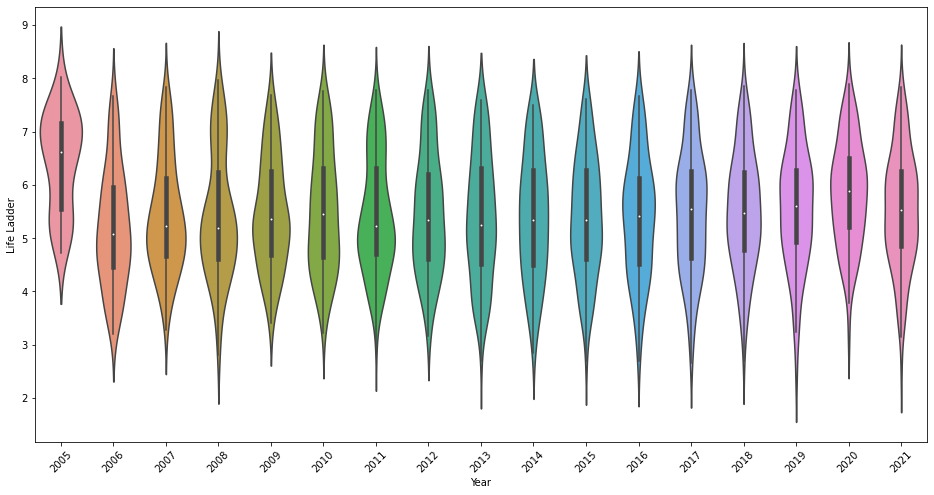

In [75]:
fig, axes = plt.subplots(figsize = (16, 8))
plot = sb.violinplot(x="Year", y="Life Ladder", data=data, ax = axes)
plt.xticks(rotation=45)

### Heat Map

<AxesSubplot:>

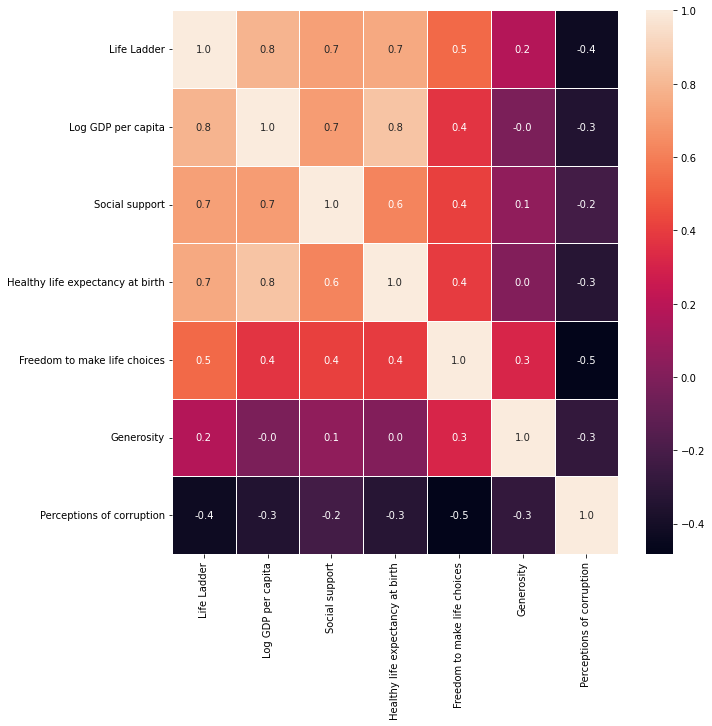

In [77]:
data_c = data.drop(['Year'],axis=1)
f,ax = plt.subplots(figsize=(10, 10))     #heatmap showing relationship of some factors compared to one another
sb.heatmap(data_c.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Building Regression Models
---


Conclusion
---
